### 1.import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2.Import dataset of avocado(also show top 5 colums,shape and colums name)

In [19]:
avdata = pd.read_csv('avocado.csv')

In [5]:
avdata.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [7]:
avdata.shape

(18249, 14)

In [16]:
avdata.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [10]:
avdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


### 3.Remove Unnamed: 0 variable

In [22]:
avdata = avdata.drop(columns='Unnamed: 0'); avdata.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

### 4.List number of null values for each variable.

In [23]:
pd.isnull(avdata).sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

### 5.Illustrate relationship between Total Bags and Small Bags using scatter plot.

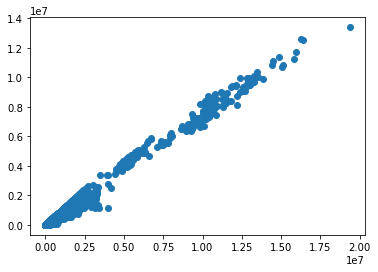

In [25]:
plt.scatter(avdata['Total Bags'], avdata['Small Bags'])

### 6.Construct AveragePrice distribution.

(array([ 152., 1116., 3077., 3731., 3570., 2876., 2071.,  908.,  447.,
         164.,   84.,   48.,    5.]),
 array([0.44      , 0.65615385, 0.87230769, 1.08846154, 1.30461538,
        1.52076923, 1.73692308, 1.95307692, 2.16923077, 2.38538462,
        2.60153846, 2.81769231, 3.03384615, 3.25      ]),
 <a list of 1 Patch objects>)

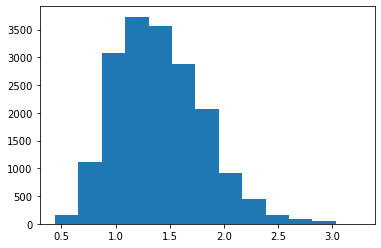

In [35]:
plt.hist(avdata['AveragePrice'], bins = 13, histtype = "stepfilled")

### 7.Which type of Avocados are expensive?(with boxplot)

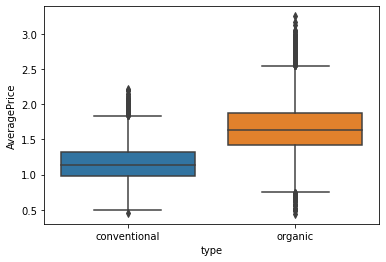

In [37]:
import seaborn as sns
sns.boxplot(x="type", y="AveragePrice", data=avdata)

# Organic types are more expensive

### 8.Construct heatmap correlation matrix.

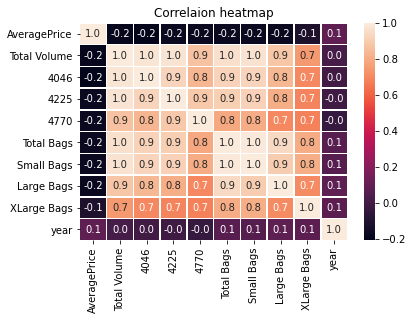

In [42]:
sns.heatmap(avdata.corr(), annot=True, fmt=".1f", linewidth=0.5)
plt.title("Correlaion heatmap")
plt.show()

### 9.Find relationship between large and small bags using scatterplot.(use jointplot function)

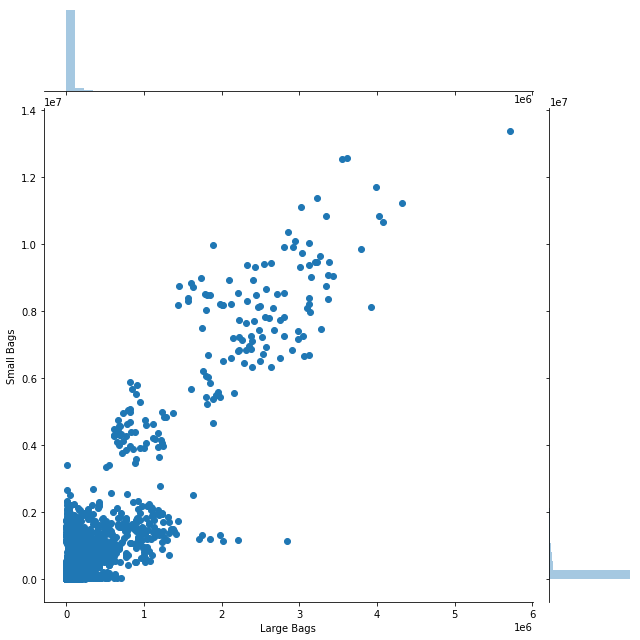

In [66]:
sns.jointplot(x='Large Bags', y='Small Bags', data=avdata, kind='scatter', height=9)
# There's a positive correlation btw 2 variables, although majority of distribution falls in the (0, 0.1) range for both v.

### 10.Find linear relationship between Total Volume and Bags for each avocado type.(use lmplot function)

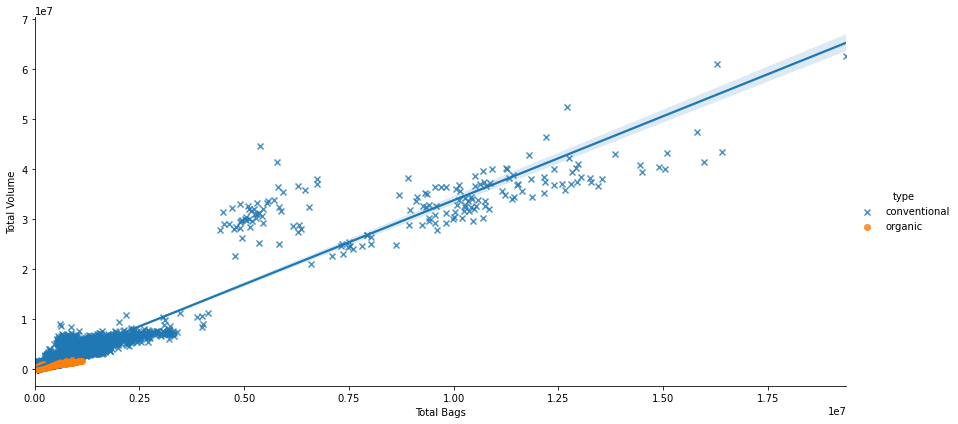

In [81]:
sns.lmplot(x='Total Bags', y='Total Volume', data=avdata, hue='type', markers=['x', 'o'], height=6, aspect=2)